In [1]:
!pip install bokeh

     ---------------------------------------- 8.3/8.3 MB 12.0 MB/s eta 0:00:00
     ---------------------------------------- 56.5/56.5 kB ? eta 0:00:00

[notice] A new release of pip available: 22.2 -> 23.1.2
[notice] To update, run: C:\Users\qochu\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [186]:
from gensim.models import Word2Vec
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.decomposition import PCA
import numpy as np

In [187]:
data = pd.read_csv('data.tsv', delimiter='\t')
data

,CRH,RU
0,– душман арбий эсирлерининъ лагерьге (больгеге...,- организации мероприятий передачи военноплен...
1,Миллий емеклер,Национальные блюда
2,Купе-куньдюз,Средь бела дня
3,"Хабердар эткенимиз киби, мезкюр Джедвель, Муда...","Как мы сообщали, указанный перечень формирует..."
4,Экинджи муим бир янъылыкъ: ДАКнинъ ерлештириль...,Вторая важная новация: компенсация за приют В...
...,...,...
30042,«Бугунь эсирлерми денъитирдик. 14 инсанымыз эв...,"""Сегодня обменяли пленных. Возвращаем домой 1..."
30043,«къырым джумхуриетинде бюджетлерара мунасебетл...,поручить комитету государственного совета респ...
30044,Муавин,Заместитель
30045,"2009 с. , № 6, 479 мад.) ашагъыдаки денъишме к...","2009 г., № 6, ст. 479) след ующее изменение: п..."


In [188]:
def remove_chars_from_text(string, chars):
    "".join([w for w in a if w in chars])

In [189]:
RU_sentences = []
CRH_sentences = []

RU_vocab = set()
CRH_vocab = set()

for line in data['RU']:
    line = line.lower()
    line = word_tokenize(line)
    line = [word.lower() for word in line if word.isalpha()]
    RU_sentences.append(line)
    for word in line:
        RU_vocab.add(word)
    

for line in data['CRH']:
    line = line.lower()
    line = word_tokenize(line)
    line = [word.lower() for word in line if word.isalpha()]
    CRH_sentences.append(line)
    for word in line:
        CRH_vocab.add(word)

In [190]:
print(len(RU_vocab))
print(len(CRH_vocab))

37296
38295


In [193]:
w2v_model = Word2Vec(RU_sentences, 
                    vector_size=300, 
                    min_count=10, 
                    window=3, 
                    workers=6, 
                    sample=6e-5, 
                    alpha=0.03, 
                    min_alpha=0.0007, 
                    negative=15)
w2v_model.build_vocab(RU_sentences, progress_per=10000)
w2v_model.train(RU_sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(8165484, 22608210)

In [195]:
vector_dict = {}
for key in w2v_model.wv.get_normed_vectors():
    vector_dict[w2v_model.wv.similar_by_vector(key)[0][0]] = key

In [196]:
pca = PCA(n_components=2)

dim2_vectors = np.array(pca.fit_transform(list(vector_dict.values())))

In [197]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue', width=600, height=400, show=True, **kwargs):
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({'x': x, 'y': y, 'color': color, **kwargs})
    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)
    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [198]:
draw_vectors(dim2_vectors[:, 0], dim2_vectors[:, 1], token=list(vector_dict.keys()))

figure(id='p1496', ...)

In [201]:
w2v_model = Word2Vec(CRH_sentences, 
                    vector_size=300, 
                    min_count=10, 
                    window=3, 
                    workers=6, 
                    sample=6e-5, 
                    alpha=0.03, 
                    min_alpha=0.0007, 
                    negative=15)
w2v_model.build_vocab(CRH_sentences, progress_per=10000)
w2v_model.train(CRH_sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

(8261682, 22574970)

In [202]:
vector_dict = {}
for key in w2v_model.wv.get_normed_vectors():
    vector_dict[w2v_model.wv.similar_by_vector(key)[0][0]] = key

In [203]:
pca = PCA(n_components=2)

dim2_vectors = np.array(pca.fit_transform(list(vector_dict.values())))

In [204]:
import bokeh.models as bm, bokeh.plotting as pl
from bokeh.io import output_notebook
output_notebook()

def draw_vectors(x, y, radius=10, alpha=0.25, color='blue', width=600, height=400, show=True, **kwargs):
    if isinstance(color, str): color = [color] * len(x)
    data_source = bm.ColumnDataSource({'x': x, 'y': y, 'color': color, **kwargs})
    fig = pl.figure(active_scroll='wheel_zoom', width=width, height=height)
    fig.scatter('x', 'y', size=radius, color='color', alpha=alpha, source=data_source)
    fig.add_tools(bm.HoverTool(tooltips=[(key, "@" + key) for key in kwargs.keys()]))
    if show: pl.show(fig)
    return fig

Loading BokehJS ...

In [205]:
draw_vectors(dim2_vectors[:, 0], dim2_vectors[:, 1], token=list(vector_dict.keys()))

figure(id='p1688', ...)

In [199]:
import matplotlib.pyplot as plt

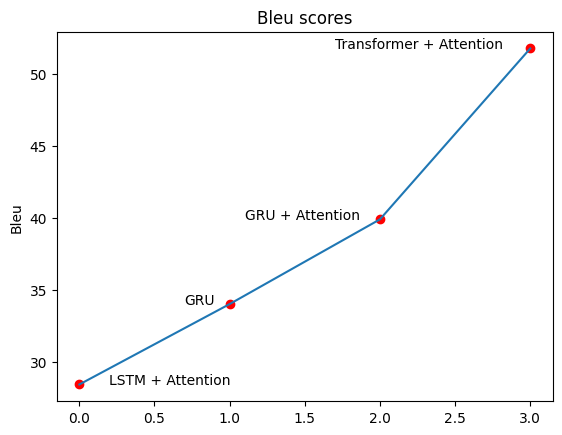

In [200]:
model_list = ['LSTM + Attention', 'GRU', 'GRU + Attention', 'Transformer + Attention']
bleu_list = [28.4, 34, 39.9, 51.8]

plt.title('Bleu scores')
plt.plot([0, 1, 2, 3], bleu_list)
plt.scatter([0, 1, 2, 3], bleu_list, c = 'r')
plt.text(0.2, bleu_list[0], model_list[0])
plt.text(0.7, bleu_list[1], model_list[1])
plt.text(1.1, bleu_list[2], model_list[2])
plt.text(1.7, bleu_list[3], model_list[3])
plt.ylabel('Bleu')
plt.show()